In [1]:
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
# Feature Engineering and Preprocessing for Predictive Maintenance

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load and Initial Exploration
df = pd.read_csv('/Users/akashgodbole/Desktop/Akash/Projects/predictive-maintenance/data/raw/predictive_maintenance.csv')

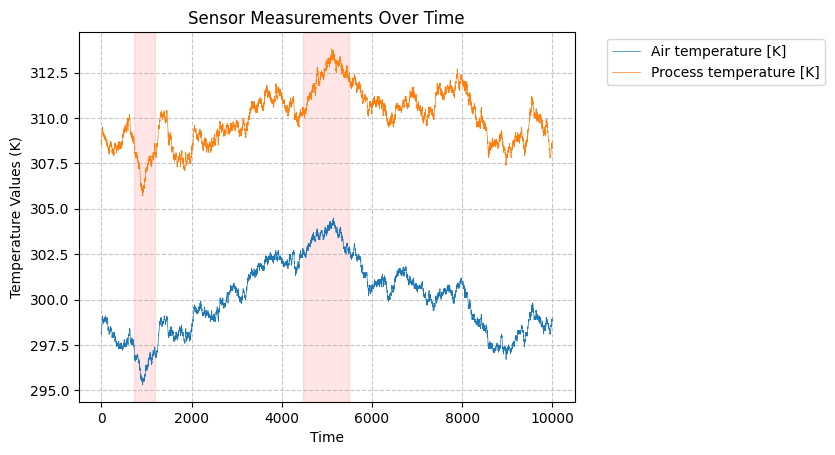

In [37]:
columns_to_plot = [
    'Air temperature [K]',
    'Process temperature [K]',
    # 'Rotational speed [rpm]',
    # 'Torque [Nm]',
    # 'Tool wear [min]'
]

for column in columns_to_plot:
    # Normalize the data to make it comparable
    # normalized_data = (df[column] - df[column].min()) / (df[column].max() - df[column].min())
    plt.plot(df[column], label=column, linewidth=0.5)

failure_points = df[df['Failure Type'] == 'Power Failure'].index

# Add vertical lines for failures
# for idx in failure_points:
#     plt.axvline(x=idx, color='red', alpha=0.5, linestyle='--', linewidth=0.5)

start_idx = df[df['Air temperature [K]'] > 302.7].index[0]
end_idx = 5500  # Don't exceed dataset length
plt.axvspan(start_idx, end_idx, color='red', alpha=0.1)

start_idx = df[df['Air temperature [K]'] < 297].index[0]
end_idx = 1200  # Don't exceed dataset length
plt.axvspan(start_idx, end_idx, color='red', alpha=0.1)

plt.title('Sensor Measurements Over Time', fontsize=12)
plt.xlabel('Time', fontsize=10)
plt.ylabel('Temperature Values (K)', fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='best')
plt.grid(True, linestyle='--', alpha=0.7)

# plt.tight_layout()

# Show the plot
plt.show()

# Optional: Create a non-normalized version
# plt.figure(figsize=(12, 6))

# Create subplots for each measure to handle different scales
# fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))



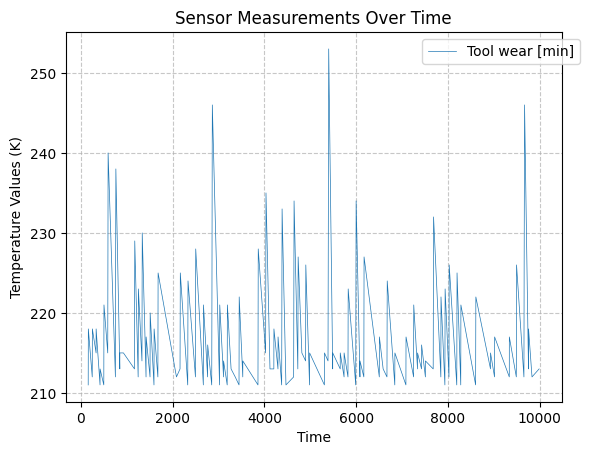

In [42]:
columns_to_plot = [
    # 'Rotational speed [rpm]',
    # 'Torque [Nm]',
    'Tool wear [min]'
]

for column in columns_to_plot:
    # Normalize the data to make it comparable
    # normalized_data = (df[column] - df[column].min()) / (df[column].max() - df[column].min())
    plt.plot(df[df[column] > 210][column], label=column, linewidth=0.5)

plt.title('Sensor Measurements Over Time', fontsize=12)
plt.xlabel('Time', fontsize=10)
plt.ylabel('Temperature Values (K)', fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='best')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [6]:
df.apply(lambda x: x.nunique())

UDI                        10000
Product ID                 10000
Type                           3
Air temperature [K]           93
Process temperature [K]       82
Rotational speed [rpm]       941
Torque [Nm]                  577
Tool wear [min]              246
Target                         2
Failure Type                   6
dtype: int64

In [4]:
df['Type'].unique()

array(['M', 'L', 'H'], dtype=object)

In [5]:
df['Failure Type'].unique()

array(['No Failure', 'Power Failure', 'Tool Wear Failure',
       'Overstrain Failure', 'Random Failures',
       'Heat Dissipation Failure'], dtype=object)

In [6]:
df['Failure Type'].value_counts()

Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64

In [7]:

df.drop(df.columns[:2],axis=1,inplace=True)
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure


In [8]:

from sklearn .preprocessing import LabelEncoder
encoder=LabelEncoder()


In [9]:
df['Type_encoded'] = encoder.fit_transform(df['Type'])
df['Failure_Type_encoded'] = encoder.fit_transform(df['Failure Type'])
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Type_encoded,Failure_Type_encoded
0,M,298.1,308.6,1551,42.8,0,0,No Failure,2,1
1,L,298.2,308.7,1408,46.3,3,0,No Failure,1,1
2,L,298.1,308.5,1498,49.4,5,0,No Failure,1,1
3,L,298.2,308.6,1433,39.5,7,0,No Failure,1,1
4,L,298.2,308.7,1408,40.0,9,0,No Failure,1,1


In [10]:
df.drop(df[['Type']],axis=1,inplace=True)
df.drop(df[['Failure Type']],axis=1,inplace=True)

In [11]:
df.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Type_encoded,Failure_Type_encoded
0,298.1,308.6,1551,42.8,0,0,2,1
1,298.2,308.7,1408,46.3,3,0,1,1
2,298.1,308.5,1498,49.4,5,0,1,1
3,298.2,308.6,1433,39.5,7,0,1,1
4,298.2,308.7,1408,40.0,9,0,1,1


<Axes: >

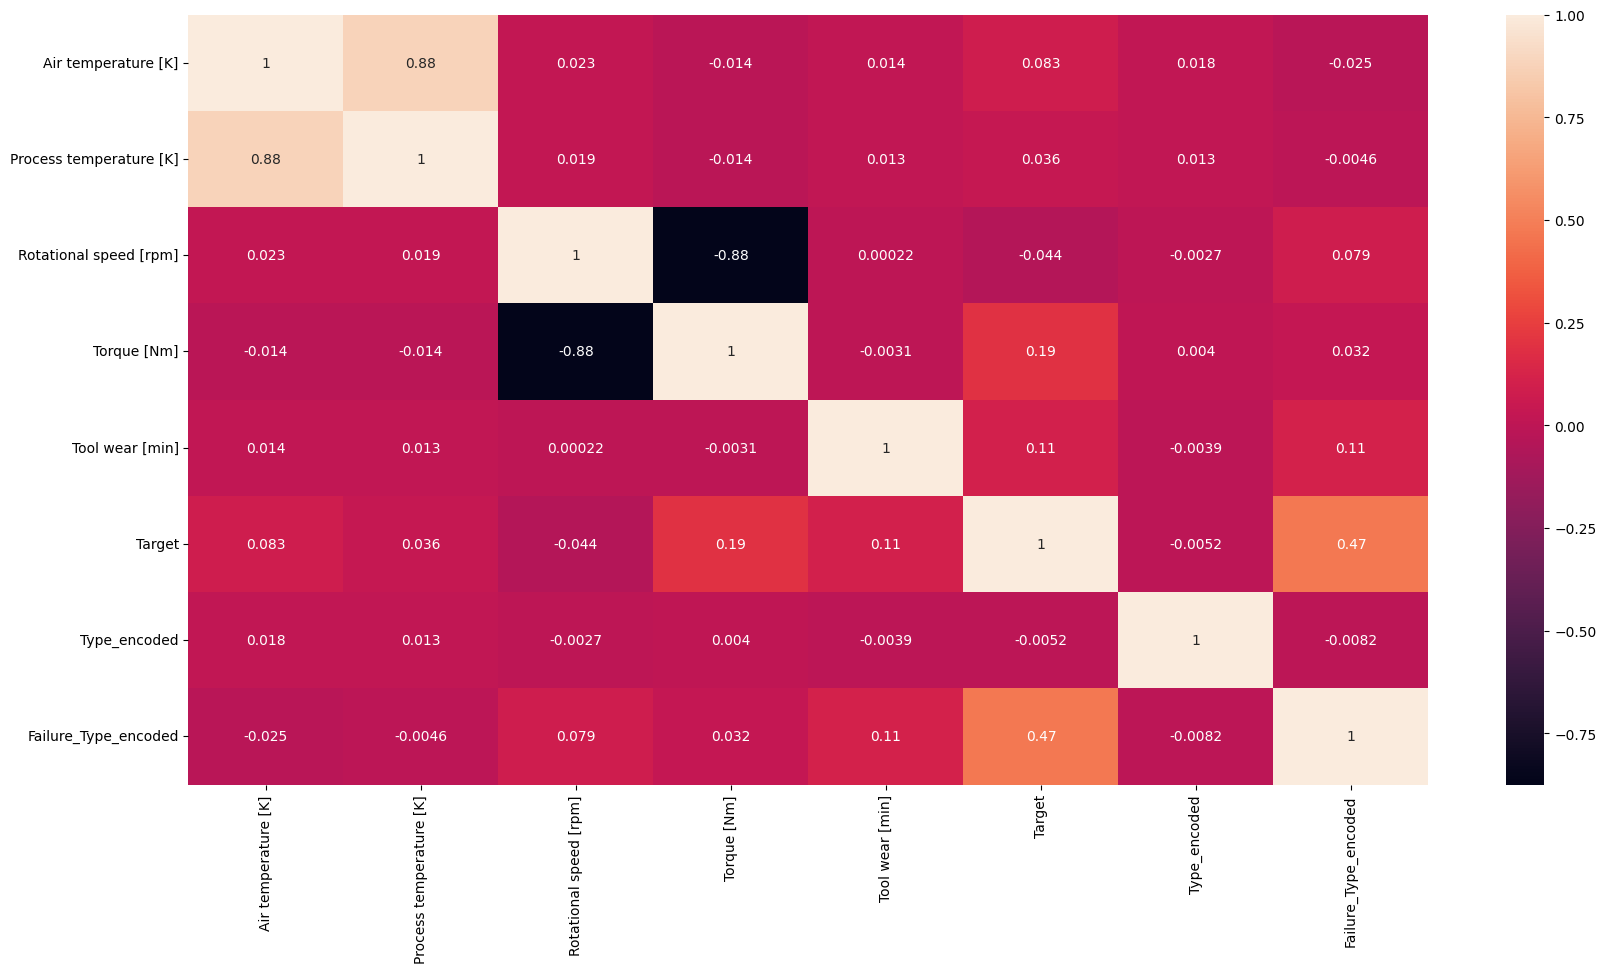

In [12]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)

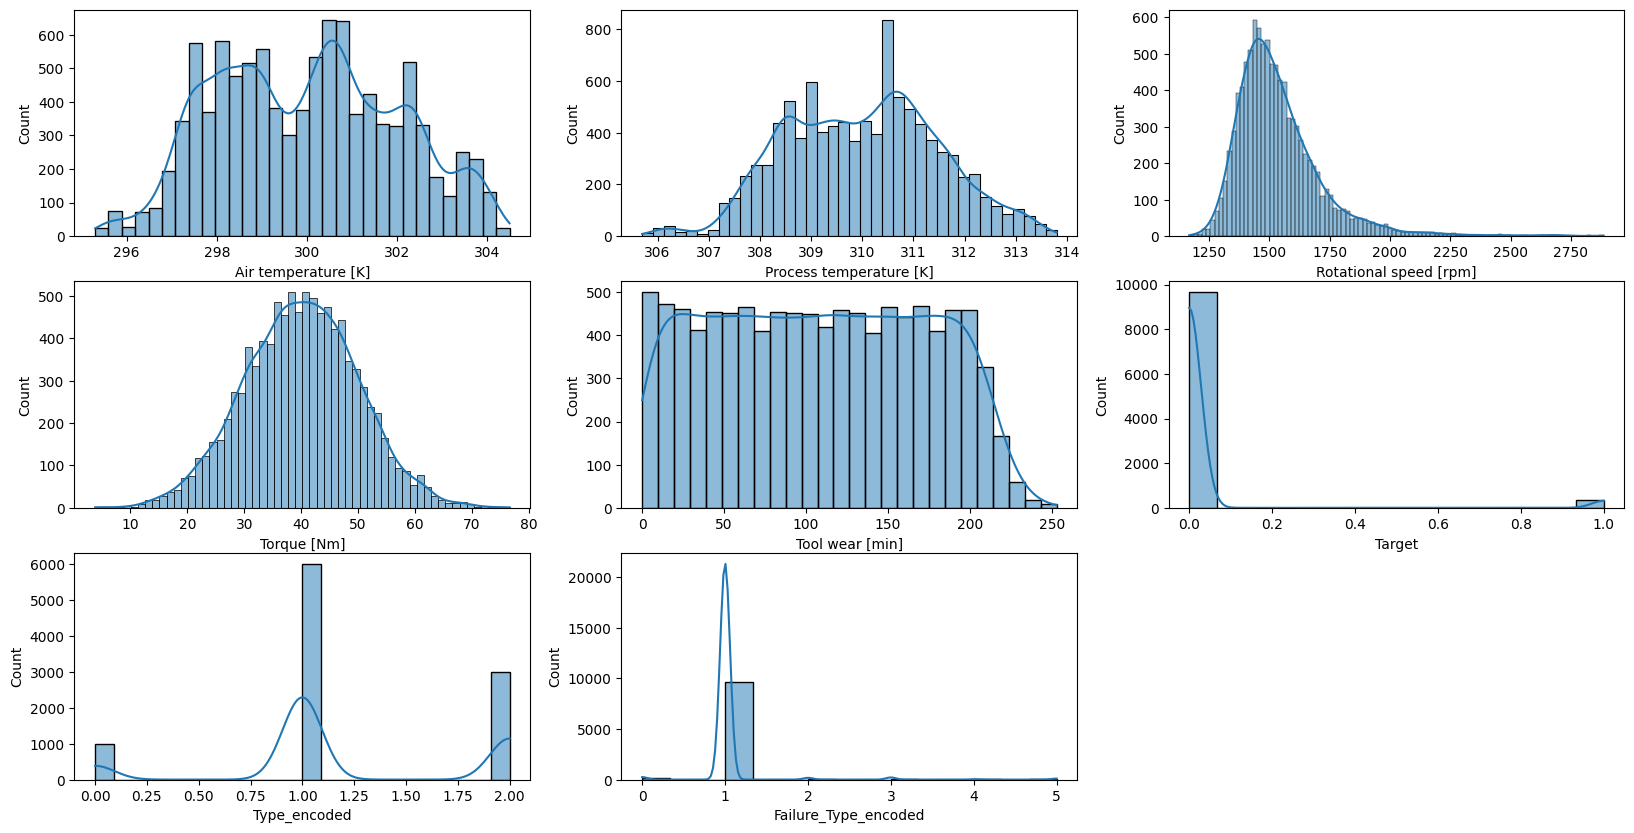

In [13]:

plt.figure(figsize=(20,10))
for i,col in enumerate(df.columns,1):
    plt.subplot(3,3,i)
    sns.histplot(df[col],kde=True)

In [14]:
df.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Type_encoded,Failure_Type_encoded
0,298.1,308.6,1551,42.8,0,0,2,1
1,298.2,308.7,1408,46.3,3,0,1,1
2,298.1,308.5,1498,49.4,5,0,1,1
3,298.2,308.6,1433,39.5,7,0,1,1
4,298.2,308.7,1408,40.0,9,0,1,1


In [15]:
df.drop(df[['Target']],axis=1,inplace=True)

In [16]:
df.columns = df.columns.str.replace('[\[\]<> ]', '_', regex=True)
print(df.columns)

Index(['Air_temperature__K_', 'Process_temperature__K_',
       'Rotational_speed__rpm_', 'Torque__Nm_', 'Tool_wear__min_',
       'Type_encoded', 'Failure_Type_encoded'],
      dtype='object')


In [17]:
df.head()

,Air_temperature__K_,Process_temperature__K_,Rotational_speed__rpm_,Torque__Nm_,Tool_wear__min_,Type_encoded,Failure_Type_encoded
0,298.1,308.6,1551,42.8,0,2,1
1,298.2,308.7,1408,46.3,3,1,1
2,298.1,308.5,1498,49.4,5,1,1
3,298.2,308.6,1433,39.5,7,1,1
4,298.2,308.7,1408,40.0,9,1,1


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Air_temperature__K_      10000 non-null  float64
 1   Process_temperature__K_  10000 non-null  float64
 2   Rotational_speed__rpm_   10000 non-null  int64  
 3   Torque__Nm_              10000 non-null  float64
 4   Tool_wear__min_          10000 non-null  int64  
 5   Type_encoded             10000 non-null  int64  
 6   Failure_Type_encoded     10000 non-null  int64  
dtypes: float64(3), int64(4)
memory usage: 547.0 KB


In [19]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["Failure_Type_encoded"])
y = df["Failure_Type_encoded"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
accuracies = {}

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


logreg = LogisticRegression(max_iter=500, class_weight='balanced')
logreg.fit(X_train_scaled, y_train)


y_pred_lr = logreg.predict(X_test_scaled)


log_train = round(logreg.score(X_train_scaled, y_train) * 100, 2)
log_accuracy = round(accuracy_score(y_pred_lr, y_test) * 100, 2)

print("Training Accuracy    :", log_train, "%")
print("Model Accuracy Score :", log_accuracy, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n", classification_report(y_test, y_pred_lr))
print("\033[1m-------------------------------------------------------\033[0m")

accuracies['Logistic Regression'] = log_accuracy

Training Accuracy    : 63.38 %
Model Accuracy Score : 63.6 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.18      1.00      0.31        15
           1       1.00      0.63      0.77      1935
           2       0.22      1.00      0.36        13
           3       0.40      0.90      0.55        20
           4       0.00      0.17      0.00         6
           5       0.04      0.73      0.08        11

    accuracy                           0.64      2000
   macro avg       0.31      0.74      0.35      2000
weighted avg       0.97      0.64      0.76      2000

-------------------------------------------------------


Training Accuracy    : 100.0 %
Model Accuracy Score : 97.2 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.67      0.80      0.73        15
           1       0.99      0.99      0.99      1935
           2       0.53      0.77      0.62        13
           3       0.67      0.50      0.57        20
           4       0.00      0.00      0.00         6
           5       0.14      0.09      0.11        11

    accuracy                           0.97      2000
   macro avg       0.50      0.52      0.50      2000
weighted avg       0.97      0.97      0.97      2000

--------------------------------------------------------


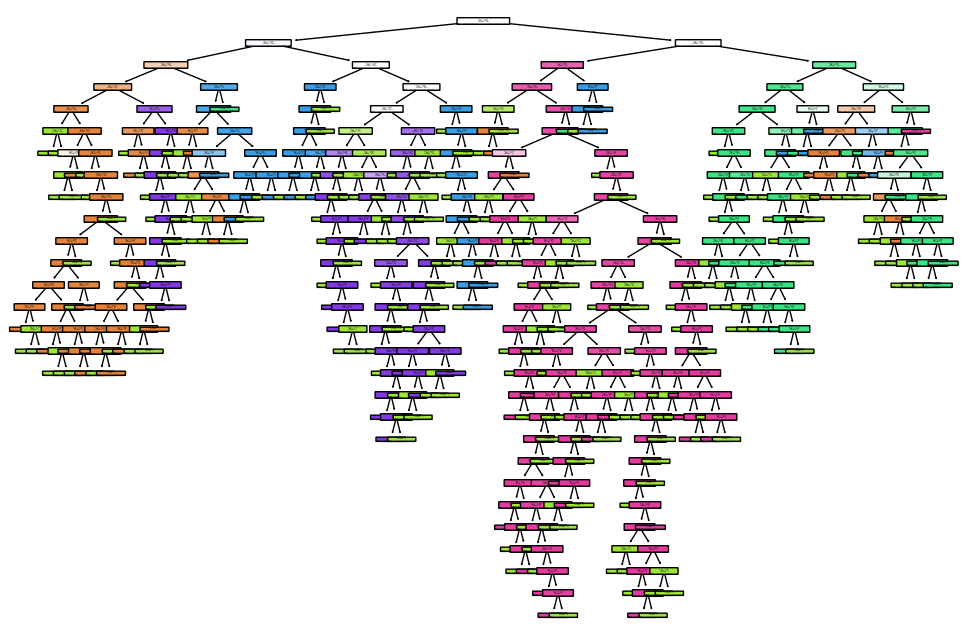

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
decision = DecisionTreeClassifier(class_weight='balanced')

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

decision.fit(X_train_scaled, y_train)
y_pred_dec = decision.predict(X_test_scaled)

decision_train = round(decision.score(X_train_scaled, y_train) * 100, 2)
decision_accuracy = round(accuracy_score(y_pred_dec, y_test) * 100, 2)

print("Training Accuracy    :",decision_train ,"%")
print("Model Accuracy Score :",decision_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_dec))
print("\033[1m--------------------------------------------------------\033[0m")

accuracies['Decision Tree'] = decision_accuracy

plt.figure(figsize=(12, 8))
tree.plot_tree(decision, 
               filled=True,  # Fill nodes with colors
               rounded=True)  # Rounded corners for nodes
plt.show()

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
random_forest = RandomForestClassifier(n_estimators=500,class_weight='balanced')

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



random_forest.fit(X_train_scaled, y_train)
y_pred_rf = random_forest.predict(X_test_scaled)


random_forest_train = round(random_forest.score(X_train_scaled, y_train) * 100, 2)
random_forest_accuracy = round(accuracy_score(y_pred_rf, y_test) * 100, 2)

print("Training Accuracy    :",random_forest_train ,"%")
print("Model Accuracy Score :",random_forest_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_rf,zero_division=1))
print("\033[1m--------------------------------------------------------\033[0m")

accuracies['Random Forest'] = random_forest_accuracy

Training Accuracy    : 100.0 %
Model Accuracy Score : 97.7 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.83      0.67      0.74        15
           1       0.98      1.00      0.99      1935
           2       0.75      0.46      0.57        13
           3       0.75      0.45      0.56        20
           4       1.00      0.00      0.00         6
           5       1.00      0.00      0.00        11

    accuracy                           0.98      2000
   macro avg       0.89      0.43      0.48      2000
weighted avg       0.98      0.98      0.97      2000

--------------------------------------------------------


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report


decision = DecisionTreeClassifier(class_weight='balanced')
decision.fit(X_train, y_train)


y_pred_dec = decision.predict(X_test)


decision_train = round(decision.score(X_train, y_train) * 100, 2)
decision_accuracy = round(accuracy_score(y_pred_dec, y_test) * 100, 2)


print("Training Accuracy    :", decision_train, "%")
print("Model Accuracy Score :", decision_accuracy, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n", classification_report(y_test, y_pred_dec))
print("\033[1m--------------------------------------------------------\033[0m")

accuracies['Decision Tree'] = decision_accuracy

Training Accuracy    : 100.0 %
Model Accuracy Score : 97.35 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.67      0.80      0.73        15
           1       0.99      0.99      0.99      1935
           2       0.53      0.77      0.62        13
           3       0.67      0.50      0.57        20
           4       0.00      0.00      0.00         6
           5       0.25      0.18      0.21        11

    accuracy                           0.97      2000
   macro avg       0.52      0.54      0.52      2000
weighted avg       0.97      0.97      0.97      2000

--------------------------------------------------------


In [24]:
%pip install xgboost
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Fit the model to the training data
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_XGB = xgb_model.predict(X_test)

# Calculate training and test accuracies
XGBClassifier_train = round(xgb_model.score(X_train, y_train) * 100, 2)
XGBClassifier_accuracy = round(accuracy_score(y_pred_XGB, y_test) * 100, 2)

# Print the results
print("Training Accuracy    :", XGBClassifier_train, "%")
print("Model Accuracy Score :", XGBClassifier_accuracy, "%")
print("--------------------------------------------------------")
print("Classification_Report: \n", classification_report(y_test, y_pred_XGB))
print("--------------------------------------------------------")


Note: you may need to restart the kernel to use updated packages.


/usr/local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:54:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Training Accuracy    : 100.0 %
Model Accuracy Score : 98.2 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.88      0.93      0.90        15
           1       0.99      1.00      0.99      1935
           2       0.69      0.85      0.76        13
           3       0.80      0.60      0.69        20
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00        11

    accuracy                           0.98      2000
   macro avg       0.56      0.56      0.56      2000
weighted avg       0.97      0.98      0.98      2000

--------------------------------------------------------


/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
